#GOAL:
1. Create an random tall skinny matrix X (usually one or no solution).
2. Perform the full and economy SVD of the X and compare the dimensions of the two decompositions.
3. Print the Coulmn space, row space, Left null space and the Null space of the matrix A and show their relationship to the economy SVD decomposition.  


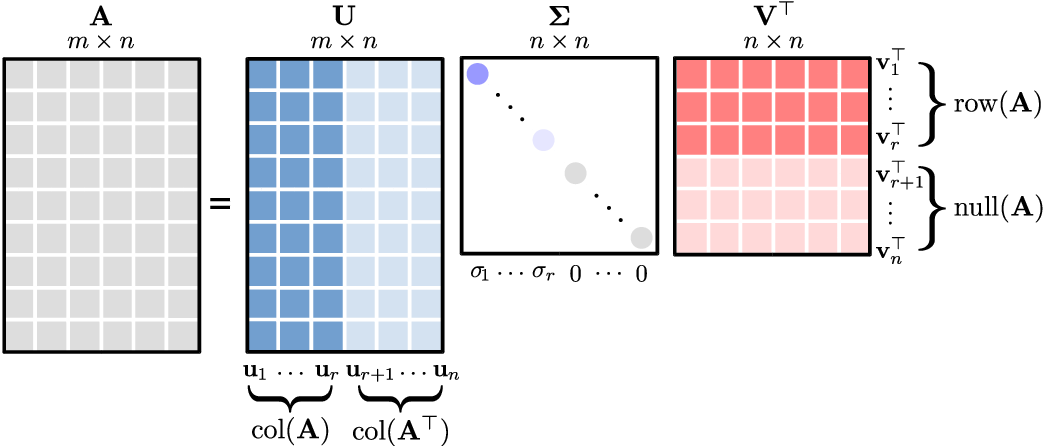

In [1]:
import numpy as np

In [2]:
# defining a random matrix X ; X = Tall skinny matrrix
X = np.random.rand(5,2)
rank = np.linalg.matrix_rank(X)
print(f'Rank of the matrix X is: {rank}') # --- rank = 2
print()
print(f'The random X matrix is: \n{X}')


Rank of the matrix X is: 2

The random X matrix is: 
[[0.71329689 0.12989245]
 [0.68522726 0.07391944]
 [0.79050067 0.63517757]
 [0.34754069 0.92062522]
 [0.55084655 0.49702574]]


In [3]:
# Computing the full SVD
(U, S, VT) = np.linalg.svd(X, full_matrices = True)
print(f'U matrix is:\n {U}')
print(f'Shape of the U matrix is: {U.shape}')
print()
print(f'S matrix is:\n {S}')
print(f'Shape of the S matrix is: {S.shape}')
print()
print(f'VT matrix is:\n {VT}')
print(f'Shape of the VT matrix is: {VT.shape}')

U matrix is:
 [[-0.36412974 -0.49105658 -0.58615386 -0.33261398 -0.41480665]
 [-0.33135243 -0.52695961  0.11571477  0.76110413  0.14088909]
 [-0.58171515 -0.01081674  0.71129933 -0.32848054 -0.21827568]
 [-0.48838234  0.69166681 -0.30077144  0.35878128 -0.25276917]
 [-0.42509442  0.05154634 -0.21592487 -0.27104424  0.83459522]]
Shape of the U matrix is: (5, 5)

S matrix is:
 [1.74319431 0.71350001]
Shape of the S matrix is: (2,)

VT matrix is:
 [[-0.77474156 -0.63227804]
 [-0.63227804  0.77474156]]
Shape of the VT matrix is: (2, 2)


In [5]:
# Computing the economy SVD
(U_hat, S_hat, VT_hat) = np.linalg.svd(X, full_matrices = False)
print(f'U_hat matrix is:\n {U_hat}')
print(f'Shape of the U_hat matrix is: {U_hat.shape}')
print()
print(f'S_hat matrix is:\n {S_hat}')
print(f'Shape of the S_hat matrix is: {S_hat.shape}')
print()
print(f'VT_hat matrix is:\n {VT_hat}')
print(f'Shape of the VT_hat matrix is: {VT_hat.shape}')


U_hat matrix is:
 [[-0.36412974 -0.49105658]
 [-0.33135243 -0.52695961]
 [-0.58171515 -0.01081674]
 [-0.48838234  0.69166681]
 [-0.42509442  0.05154634]]
Shape of the U_hat matrix is: (5, 2)

S_hat matrix is:
 [1.74319431 0.71350001]
Shape of the S_hat matrix is: (2,)

VT_hat matrix is:
 [[-0.77474156 -0.63227804]
 [-0.63227804  0.77474156]]
Shape of the VT_hat matrix is: (2, 2)


In [11]:
# Forming back the matrix from the economy SVD:
X_econ_svd = np.matmul(np.matmul(U_hat, np.diag(S_hat)), VT_hat)
print(X-X_econ_svd)

[[-1.11022302e-16  5.55111512e-17]
 [ 1.11022302e-16  1.94289029e-16]
 [ 2.22044605e-16  1.11022302e-16]
 [ 5.55111512e-17  0.00000000e+00]
 [ 0.00000000e+00  5.55111512e-17]]


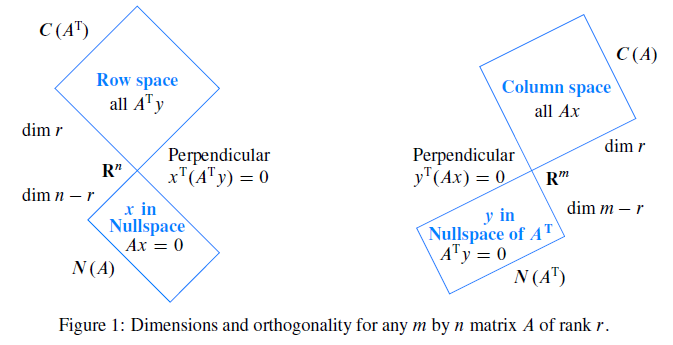

Let us now define the basis for the four fundamental subspaces for the given matrix A.   
**Av = (sigma)u**

We know the rank of marix is 2, ie:-

1. Ist 2 columns of U span the column space, and the rest span Left Null Space.
2. Ist two rows of VT span the row space of A and the rest span the Null space

In [14]:
# Compute the four fundamental subspaces
col_space = U[:, :rank]
left_null_space = U[:, rank:]

row_space = VT[:rank, :]
null_space = VT[rank:, :]


print("U:\n", U)
print()
print("Column space:\n", col_space)
print()
print("Left null space:\n", left_null_space)
print()
print("Row space VT:\n", row_space.T)
print()
print("Null space:\n", null_space.T)

U:
 [[-0.36412974 -0.49105658 -0.58615386 -0.33261398 -0.41480665]
 [-0.33135243 -0.52695961  0.11571477  0.76110413  0.14088909]
 [-0.58171515 -0.01081674  0.71129933 -0.32848054 -0.21827568]
 [-0.48838234  0.69166681 -0.30077144  0.35878128 -0.25276917]
 [-0.42509442  0.05154634 -0.21592487 -0.27104424  0.83459522]]

Column space:
 [[-0.36412974 -0.49105658]
 [-0.33135243 -0.52695961]
 [-0.58171515 -0.01081674]
 [-0.48838234  0.69166681]
 [-0.42509442  0.05154634]]

Left null space:
 [[-0.58615386 -0.33261398 -0.41480665]
 [ 0.11571477  0.76110413  0.14088909]
 [ 0.71129933 -0.32848054 -0.21827568]
 [-0.30077144  0.35878128 -0.25276917]
 [-0.21592487 -0.27104424  0.83459522]]

Row space VT:
 [[-0.77474156 -0.63227804]
 [-0.63227804  0.77474156]]

Null space:
 []


*Observe that the null space is empty since there is no free column is the Matrix A*

In [8]:
UTU = np.matmul(np.transpose(U), U)
VTV = np.matmul(VT, np.transpose(VT))
print(f'Values of U tanspose U is :\n {UTU}')
print()
print(f'Values of V tanspose V is :\n {VTV}')

Values of U tanspose U is :
 [[ 1.00000000e+00  1.00269130e-16 -5.94561560e-17 -4.55889448e-18
   3.43547347e-17]
 [ 1.00269130e-16  1.00000000e+00  7.72398536e-17  1.57693730e-16
   8.11611093e-17]
 [-5.94561560e-17  7.72398536e-17  1.00000000e+00 -6.61000746e-18
   2.93167453e-17]
 [-4.55889448e-18  1.57693730e-16 -6.61000746e-18  1.00000000e+00
  -1.29404945e-17]
 [ 3.43547347e-17  8.11611093e-17  2.93167453e-17 -1.29404945e-17
   1.00000000e+00]]

Values of V tanspose V is :
 [[ 1.00000000e+00 -1.16667789e-17]
 [-1.16667789e-17  1.00000000e+00]]


In [9]:
UUT = np.matmul(U, np.transpose(U))
VVT = np.matmul(np.transpose(VT), VT)
print(f'Values of U*Utanspose is :\n {UUT}')
print()
print(f'Values of V*Vtanspose is :\n {VVT}')

Values of U*Utanspose is :
 [[ 1.00000000e+00  1.14132184e-16  3.89901062e-17 -8.60948944e-17
  -1.18258784e-16]
 [ 1.14132184e-16  1.00000000e+00  1.44216693e-16  5.73206314e-17
   4.91611529e-17]
 [ 3.89901062e-17  1.44216693e-16  1.00000000e+00 -5.01104946e-18
  -1.58713094e-18]
 [-8.60948944e-17  5.73206314e-17 -5.01104946e-18  1.00000000e+00
  -6.66031081e-17]
 [-1.18258784e-16  4.91611529e-17 -1.58713094e-18 -6.66031081e-17
   1.00000000e+00]]

Values of V*Vtanspose is :
 [[ 1.00000000e+00 -1.16667789e-17]
 [-1.16667789e-17  1.00000000e+00]]


Both the U'U, U'U and V'V and VV'for full SVD is identity